**1)**

In [12]:
import random
p_Distribution = (0.2,0.4,0.1,0.1,0.1,0.1)
def roll(p_Distribution):
    Roll = random.random()
    sum = 0
    result = 1
    for p in p_Distribution:
        sum += p
        if Roll < sum:
            return result
        result+=1

def dice(p_Distribution):
  num_step = 0;
  step = 0;
  for i in range(100000):
    for i in range(250):
      result_dice = roll(p_Distribution)
      
      if result_dice==1 or result_dice==2: step=max(0,step-1)
      elif result_dice>=3 and result_dice<=5: step=step+1
      else: 
        result_new = roll(p_Distribution)
        step=step+result_new
    if step>60: num_step=num_step+1
  return num_step

num_step = dice(p_Distribution)
print("Probability : ",num_step/100000)

Probability :  0.27811


**2)**

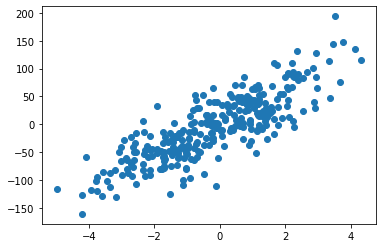

In [22]:
from matplotlib import pyplot
from sklearn.datasets import make_regression
X, Y= make_regression(n_samples=300, n_features=3, noise=0.5)
pyplot.scatter(X[:,0]+X[:,1]+X[:,2],Y)
pyplot.show()

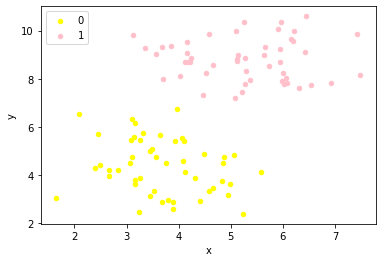

In [33]:
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from pandas import DataFrame
X2, y2 = make_blobs(n_samples=100, centers=2, n_features=2)
df = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
colors = {0:'yellow', 1:'pink'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

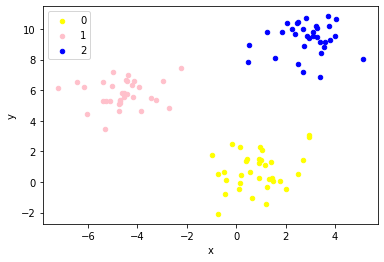

In [38]:
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=100, centers=3, n_features=2)
df = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
colors = {0:'yellow', 1:'pink', 2:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

**3)**

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef = None
        self.intercept = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept = self.params[0]
        self.coef= self.params[1:]

        return self

    def find_score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params
        

X = X1
y = y1

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

regressor = LinearRegression(X_train, y_train).fit()

train_accuracy = regressor.find_score()

test_accuracy = regressor.find_score(X_test, y_test)

pd.DataFrame([[test_accuracy],
              [train_accuracy]],
             ['Test Accuracy', 'Training Accuracy'])

,0
Test Accuracy,0.986657
Training Accuracy,0.999994


In [53]:
import numpy as np
import pandas as pd

a = X2 
b = y2 
b = Y.reshape(-1,1)

def sigmoid(z):
    return(1/(1+np.exp(-z)))

def cal_entropyloss(y_pred,target):
    return -np.mean((target*np.log(y_pred)+(1-target)*np.log(1-y_pred)))

def predict(X_test):
    preds = []
    for i in sigmoid(np.dot(X_test, W) + d):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

print(X.shape[1]) 

np.random.seed(0)
W = np.random.uniform(0,1,size=(a.shape[1],1))
d=0.5

for i in range(10000):
    Z = np.dot(X, W) + d
    Y_output = sigmoid(Z)
    E = cal_entropyloss(Y_output,Y)
    print("=",E)
    grad= Y_output - Y
    weight= np.dot(X.T,grad)/X.shape[0]
    bias = np.average(grad)
    W=W-.01*weight
    d=d-.01*bias

Y_test = predict(X_test=[1,1])
print(Y_test)

Streaming output truncated to the last 5000 lines.
= 0.27572664051790574
= 0.275698424957294
= 0.2756702152904797
= 0.275642011515764
= 0.2756138136314487
= 0.2755856216358362
= 0.2755574355272293
= 0.2755292553039316
= 0.27550108096424714
= 0.2754729125064805
= 0.27544474992893697
= 0.27541659322992224
= 0.2753884424077428
= 0.2753602974607054
= 0.2753321583871177
= 0.27530402518528774
= 0.27527589785352413
= 0.2752477763901359
= 0.27521966079343324
= 0.2751915510617262
= 0.27516344719332575
= 0.2751353491865435
= 0.2751072570396913
= 0.27507917075108196
= 0.27505109031902863
= 0.2750230157418451
= 0.27499494701784566
= 0.27496688414534526
= 0.2749388271226595
= 0.2749107759481042
= 0.27488273061999613
= 0.27485469113665234
= 0.27482665749639074
= 0.2747986296975295
= 0.27477060773838763
= 0.2747425916172847
= 0.2747145813325404
= 0.27468657688247555
= 0.27465857826541124
= 0.2746305854796693
= 0.2746025985235719
= 0.2745746173954418
= 0.27454664209360263
= 0.27451867261637836
= 0.274

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)

class RidgeLinearRegression:
       def __init__(self,X_data,Y_data,l,l2,iterations): 
           self.X=X_data
           self.Y=Y_data
           
           self.m=0
           self.c=0
           self.L=l 
           self.l2=l2  
           self.iter=iterations 
           self.n=float(len(self.X))  
       def cost(self,pred_y):
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
          
           for i in range(self.iter):
               pred_y=self.m*self.X + self.c
               
               Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
               Dc= (-2/self.n)*(self.Y-pred_y)
             
               self.m=self.m-Dm*self.L
               self.c=self.c-Dc*self.L
               
               self.history[i]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)
               
               
               
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y 
           mse=np.sum(np.square(errors))/self.n 
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('MINIMISING ERROS')
           a1.plot(self.history)


         
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('REGRESSION LINE')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='green')  
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)



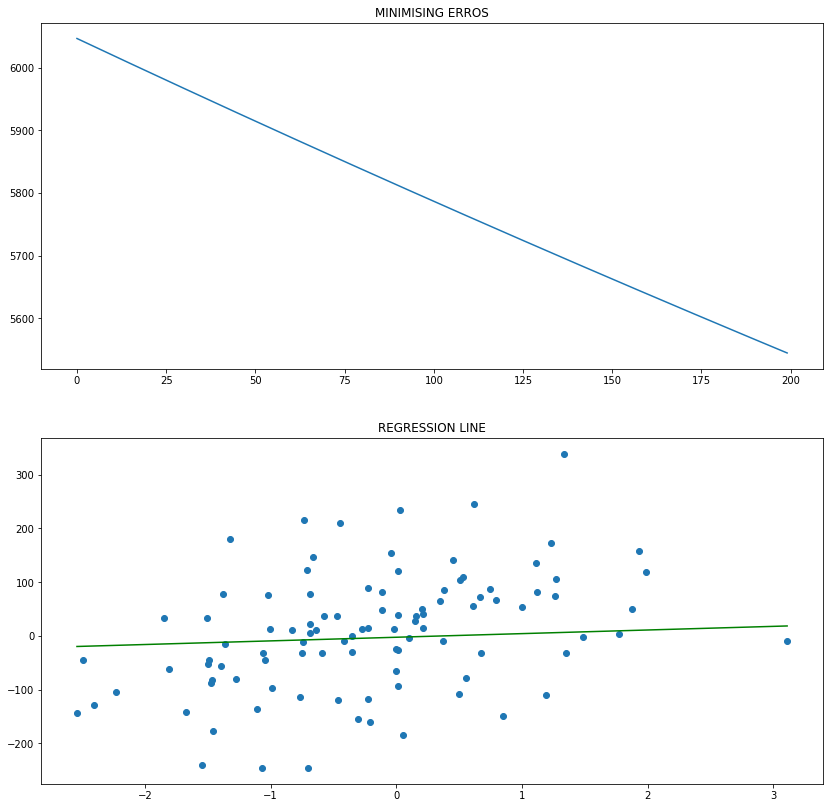

Mean Squared Error= 11088.018870639


In [61]:
l=RidgeLinearRegression(X1[:,0],y1,0.005,0.001,200)
l.fit()
l.results()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
plt.rcParams['figure.figsize'] = (5.0, 5.0)
class LassoLinearRegression:
       def __init__(self,X_data,Y_data,l,l1,iterations): 
           self.X=X_data
           self.Y=Y_data
           self.m=np.random.randn(X_data.shape[0])
           self.c=0
           self.L=l 
           self.l1=l1 
           self.iter=iterations 
           self.n=float(len(X_data))  
       
       def cost(self,pred_y): 
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l1*np.sum(self.m)
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           pred_y=np.zeros((self.Y.shape))
           for j in range(self.iter):
               for i in range(0,len(self.X)):
                       pred_y[i]=self.m[i]*self.X[i]+self.c
                       if self.m[i]>0:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))-self.l1 
                       else:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))+self.l1


                       Dc= (-2/self.n)*(self.Y[i]-pred_y[i])
                       self.m[i]=self.m[i]-Dm*self.L
                       self.c=self.c-Dc*self.L
               self.history[j]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)

             
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y 
           mse=np.sum(np.square(errors))/self.n 
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('MINIMISNG ERRORS')
           a1.plot(self.history)


          
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('REGRESSION LINE')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='green')
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

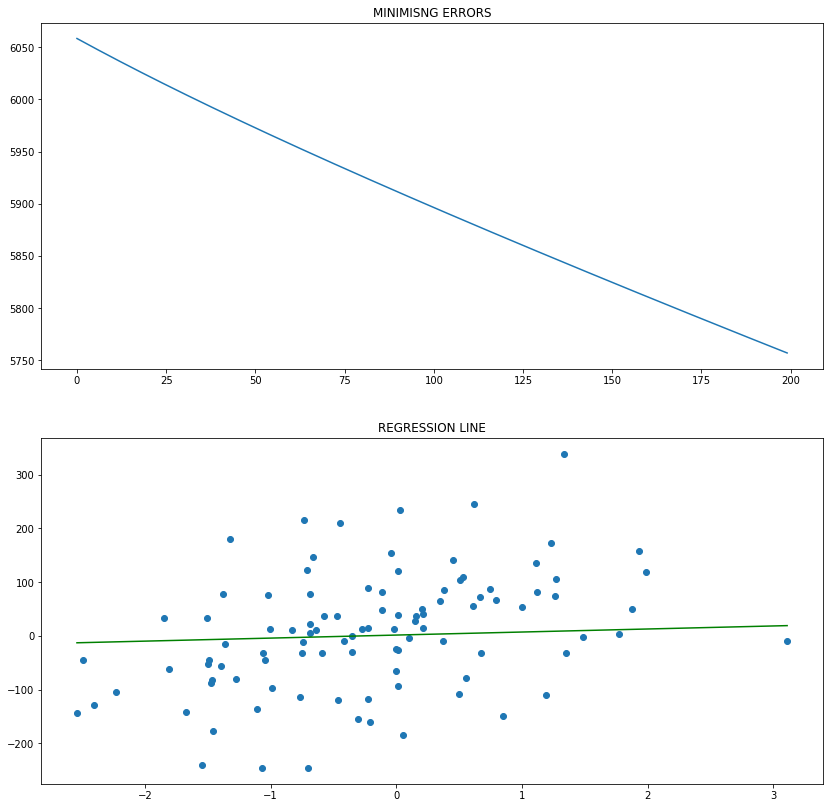

Mean Squared Error= 11514.056471344998


In [69]:
l=LassoLinearRegression(X1[:,0],y1,0.005,0.001,200)
l.fit()
l.results()

In [0]:
class _K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [0]:
c = _K_Means()
c.fit(X3)

In [78]:
correct = 0
for i in range(len(X3)):
    predict_me = np.array(X3[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = c.predict(predict_me)
    if prediction == y3[i]:
        correct += 1
print(correct/len(X3))

0.67
